In [2]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

sns.set_theme(context = "notebook", style = "darkgrid")


# Using DBSCAN

## A simple Geographical Application

### Reading our Data

In [3]:
url = "https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/nypd_murder_locations.csv"
tb_murder = pd.read_csv(url, parse_dates=["CMPLNT_FR_DT"])
tb_murder.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CMPLNT_NUM         261 non-null    int64         
 1   CMPLNT_FR_DT       261 non-null    datetime64[ns]
 2   LOC_OF_OCCUR_DESC  261 non-null    object        
 3   BORO_NM            261 non-null    object        
 4   ADDR_PCT_CD        261 non-null    float64       
 5   LAT                261 non-null    float64       
 6   LONG               261 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 14.4+ KB


(40.50960629515, 40.90712248785, -74.25538294274999, -73.70293030025)

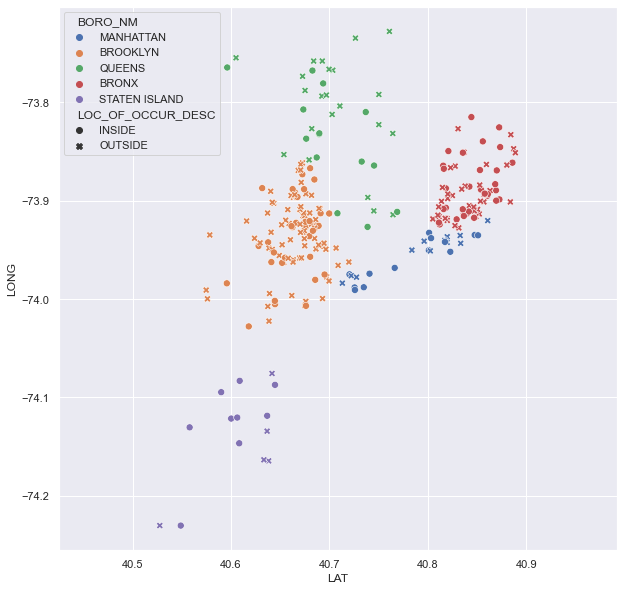

In [4]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=tb_murder, x="LAT", y="LONG", 
    hue="BORO_NM", style="LOC_OF_OCCUR_DESC", s = 50
)
plt.axis("equal")

### Data Transformation

In [5]:
tb_murder["LAT_DEMEAN"] = tb_murder["LAT"] - tb_murder["LAT"].mean()
tb_murder["LONG_DEMEAN"] = tb_murder["LONG"] - tb_murder["LONG"].mean()
tb_murder["LAT_DIST"] = tb_murder["LAT_DEMEAN"] * 113819
tb_murder["LONG_DIST"] = tb_murder["LONG_DEMEAN"] * 113819

(-24778.683637963186, 20466.21189895806, -38025.77587019646, 24853.83144651045)

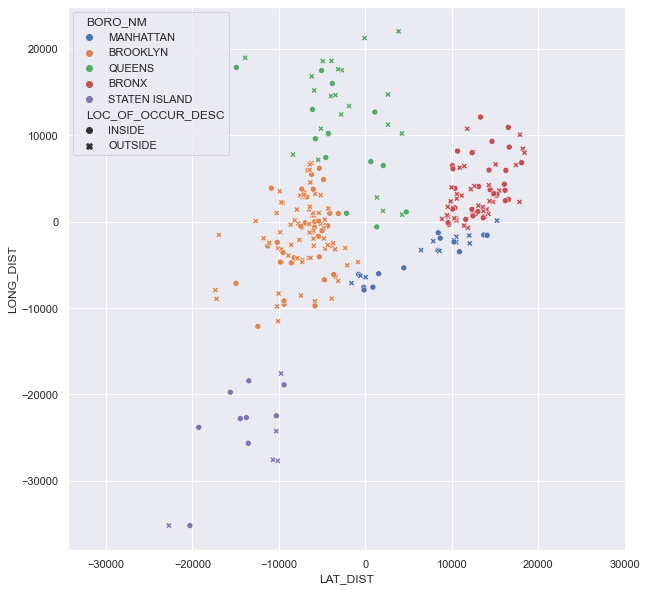

In [6]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=tb_murder, x="LAT_DIST", y="LONG_DIST", 
    hue="BORO_NM", style="LOC_OF_OCCUR_DESC"
)
plt.axis("equal")

### Fitting the DBSCAN Algorithm

In [7]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [8]:
db_fit = DBSCAN(eps = 1000, min_samples = 5)
db_fit.fit(tb_murder[["LAT_DIST", "LONG_DIST"]])

DBSCAN(eps=1000)

In [9]:
tb_murder["db_label"] = [str(x) for x in db_fit.labels_]

### Visualizing Results

(-24778.683637963186, 20466.21189895806, -38025.77587019646, 24853.83144651045)

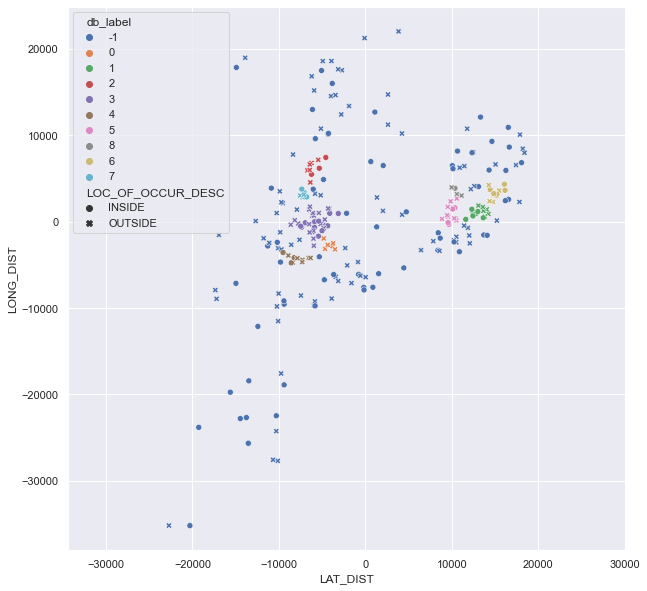

In [10]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=tb_murder, x="LAT_DIST", y="LONG_DIST", 
    hue="db_label", style="LOC_OF_OCCUR_DESC"
)
plt.axis("equal")

#### Removing outliers

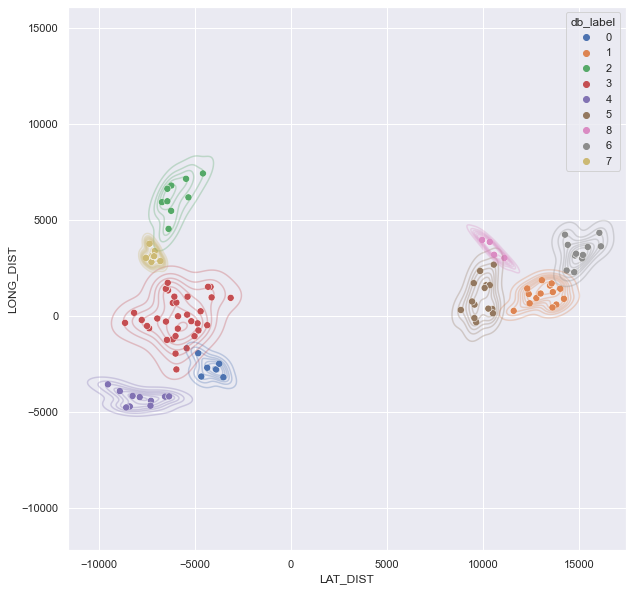

In [11]:
plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=tb_murder[tb_murder['db_label'] != "-1"], 
    x="LAT_DIST", y="LONG_DIST", 
    hue="db_label", alpha = 0.3
)
sns.scatterplot(
    data=tb_murder[tb_murder['db_label'] != "-1"], 
    x="LAT_DIST", y="LONG_DIST", 
    hue="db_label", s = 50
)
plt.axis("equal");

## Patterns in Electricity Usage

In [44]:
tb_house = pd.read_csv("data/tb_household_electricity.csv", parse_dates = ['date_time'])
tb_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   global_active_power    10000 non-null  float64       
 1   global_reactive_power  10000 non-null  float64       
 2   voltage                10000 non-null  float64       
 3   global_intensity       10000 non-null  float64       
 4   sub_metering_1         10000 non-null  float64       
 5   sub_metering_2         10000 non-null  float64       
 6   sub_metering_3         10000 non-null  float64       
 7   date_time              10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 625.1 KB


In [45]:
clu_vars = ['sub_metering_1', 'sub_metering_2', 'sub_metering_3', 'voltage', 'global_intensity']

In [16]:
scaler = StandardScaler()
scaler.fit(tb_house[clu_vars])
tb_sca_cp = scaler.transform(tb_house[clu_vars])

### Finding `eps` e `min_samples`

In [17]:
from sklearn.neighbors import NearestNeighbors

In [18]:
neighbors = int(len(clu_vars) * 2)
nbrs = NearestNeighbors(n_neighbors=neighbors)
nbrs.fit(tb_sca_cp)

NearestNeighbors(n_neighbors=10)

In [19]:
distances, indices = nbrs.kneighbors(tb_sca_cp)

Let's take a look at the `distances` array:

In [20]:
tb_distances = pd.DataFrame(distances)
tb_distances.columns = ["N_" + str(i) for i in range(neighbors)]
tb_distances.head()

,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9
0,0.0,0.030628,0.059861,0.098011,0.161721,0.182596,0.186710,0.188008,0.214779,0.220263
1,0.0,0.240528,0.311200,0.399035,0.402121,0.425012,0.431458,0.446790,0.493867,0.548123
2,0.0,0.049575,0.067383,0.089869,0.095536,0.113324,0.119451,0.125154,0.135800,0.139508
3,0.0,0.000000,0.000000,0.003063,0.003063,0.003063,0.018377,0.030628,0.030628,0.033691
4,0.0,0.006126,0.012251,0.033691,0.039817,0.044804,0.045943,0.049575,0.050974,0.052515


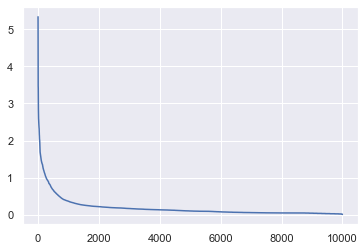

In [22]:
distance_desc = sorted(distances[:,-1], reverse=True)
plt.plot(distance_desc)

!pip install kneed

We are going to use the `kneed` library to find the optimal *knee* in our distance curve:

In [23]:
from kneed import KneeLocator

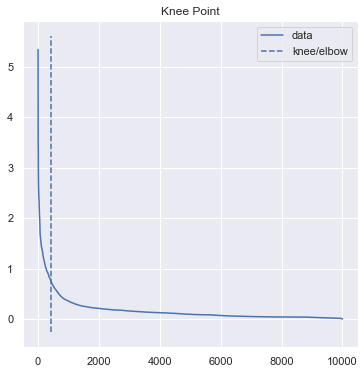

In [29]:
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc,
                      S=2,
                      curve="convex",
                      direction="decreasing")
kneedle.plot_knee();


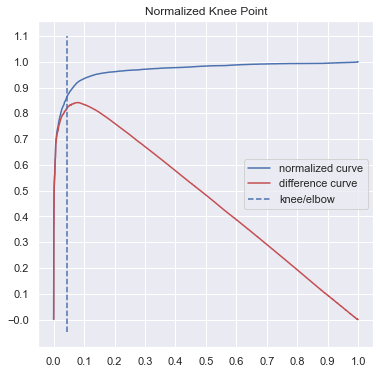

In [30]:
kneedle.plot_knee_normalized();

In [31]:
print(f"Optimal Knee found at eps = {np.round(kneedle.knee_y, 2)}\nwith min_samples = {neighbors}")

Optimal Knee found at eps = 0.75
with min_samples = 10


### Fitting DBScan

In [46]:
db_fit = DBSCAN(eps = 0.75, min_samples = 10)
db_fit.fit(tb_sca_cp)
tb_house['labels'] = [str(x) for x in db_fit.labels_]
tb_house['labels'].value_counts()

0     9398
-1     289
2      131
1       79
3       60
4       17
5       16
6       10
Name: labels, dtype: int64

In [48]:
tb_house['hour'] = tb_house['date_time'].dt.hour

In [50]:
pd.crosstab(tb_house['hour'], tb_house['labels'], normalize='columns')

labels,-1,0,1,2,3,4,5,6
hour,,,,,,,,
0,0.010381,0.048095,0.000000,0.007634,0.033333,0.000000,0.1250,0.0
1,0.003460,0.041605,0.000000,0.015267,0.016667,0.000000,0.0625,0.0
2,0.000000,0.041498,0.000000,0.007634,0.000000,0.000000,0.0000,0.0
3,0.000000,0.044052,0.000000,0.007634,0.016667,0.000000,0.0000,0.0
4,0.000000,0.044158,0.000000,0.000000,0.016667,0.000000,0.0000,0.0
5,0.003460,0.044052,0.000000,0.000000,0.000000,0.000000,0.0000,0.0
6,0.003460,0.042669,0.000000,0.007634,0.000000,0.000000,0.0000,0.0
7,0.013841,0.045967,0.063291,0.007634,0.016667,0.000000,0.0000,0.0
8,0.031142,0.043201,0.063291,0.099237,0.000000,0.000000,0.0625,0.0
